In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix,accuracy_score
import tensorflow as tf
from keras.applications.vgg16 import VGG16

2024-03-02 09:05:12.899596: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 09:05:12.899661: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 09:05:12.901255: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from glob import glob

In [3]:
train_path='/kaggle/input/chest-xray-pneumonia/chest_xray/train'
validation_path='/kaggle/input/chest-xray-pneumonia/chest_xray/test'

In [4]:
image_size=[224,224]

In [5]:
vgg=VGG16(input_shape=image_size+[3],weights='imagenet',include_top=False)

In [6]:
for layer in vgg.layers:
    layer.trainable=False

In [7]:
folders=glob('/kaggle/input/chest-xray-pneumonia/chest_xray/train/*')

In [8]:
len(folders)

2

In [9]:
x=Flatten()(vgg.output)
prediction=Dense(2,activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
train_datagen=ImageDataGenerator(rescale=1/255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2)

test_datagen=ImageDataGenerator(rescale=1/255)

In [13]:
training_set=train_datagen.flow_from_directory(train_path,
                                                target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

testing_set=test_datagen.flow_from_directory(validation_path,
                                                target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [22]:
history=model.fit(training_set,validation_data=testing_set,epochs=4)

Epoch 1/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 594ms/step - accuracy: 0.9392 - loss: 0.1492

W0000 00:00:1709370904.761022    1001 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 757ms/step - accuracy: 0.9392 - loss: 0.1491 - val_accuracy: 0.8958 - val_loss: 0.2906
Epoch 2/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 605ms/step - accuracy: 0.9281 - loss: 0.1823 - val_accuracy: 0.8894 - val_loss: 0.3258
Epoch 3/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 598ms/step - accuracy: 0.9588 - loss: 0.1071 - val_accuracy: 0.8814 - val_loss: 0.3739
Epoch 4/4
163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 611ms/step - accuracy: 0.9532 - loss: 0.1180 - val_accuracy: 0.8910 - val_loss: 0.3584


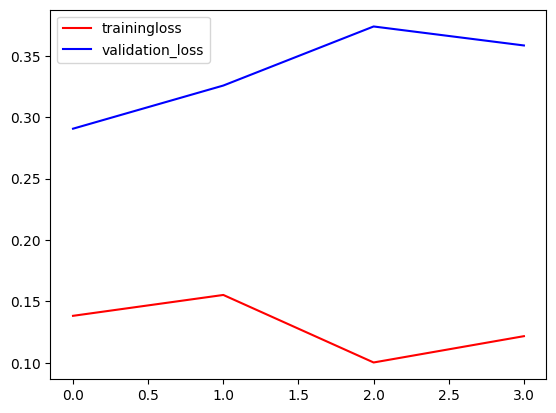

In [24]:
plt.plot(history.history['loss'],label='trainingloss',color='red')
plt.plot(history.history['val_loss'],label='validation_loss',color='blue')
plt.legend()
plt.show()

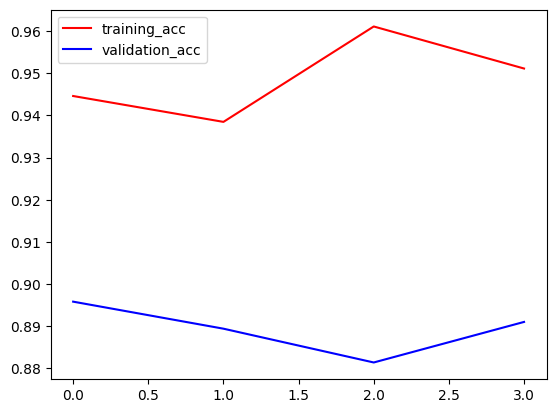

In [27]:
plt.plot(history.history['accuracy'],label='training_acc',color='red')
plt.plot(history.history['val_accuracy'],label='validation_acc',color='blue')
plt.legend()
plt.show()

In [28]:
from keras.models import load_model

In [29]:
model.save('vggnet.h5')

In [30]:
y_pred=model.predict(testing_set)

 2/20 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step

W0000 00:00:1709371522.223832    1000 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 380ms/step


In [31]:
import numpy as np

In [32]:
y_pred=np.argmax(y_pred,axis=1)

In [33]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,

In [34]:
import cv2

In [45]:
test_img=cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0005-0001.jpeg')

In [46]:
test_img=cv2.resize(test_img,(224,224))

In [47]:
test_input=test_img.reshape(1,224,224,3)

In [50]:
categories=['Safe','Pneumonia']

In [49]:
pred_name=categories[np.argmax(model.predict(test_input))]
pred_name

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


'Pneumonia'